# Question

## 2 - Analisa Variabel Diskrit

1. Distribusi peluang besar adr dari pembatalan tidaknya pemesanan hotel?
2. Bulan apa dengan jumlah pemesanan hotel terbanyak?
3. Berapa persentase pemesanan hotel yang dilakukan oleh tamu yang sudah pernah memesan hotel sebelumnya?
4. Berapa peluang paling tinggi antara no deposit, no refund, dan refundable yang melakukan pembatalan pemesanan hotel?
5. Mana yang lebih tinggi, peluang turis lokal atau non lokal yang melakukan pembatalan?

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("darkgrid")

# Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


# Analysis

## 1. Distribusi peluang besar adr dari pembatalan tidaknya pemesanan hotel?

In [4]:
def plot_dist_hue(col_name, col_name_base='is_canceled', df=df):
    # plotting
    fig, axs = plt.subplots(nrows=2, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

    ## boxplot
    sns.boxplot(data=df, x=col_name, y=col_name_base, ax=axs[0], orient='h')
    axs[0].set_xlabel(col_name, fontsize=14)
    axs[0].tick_params(labelsize=12)

    ## histogram and kde
    sns.histplot(data=df, x=col_name, hue=col_name_base, multiple='layer', ax=axs[1], kde=True)
    axs[1].set_xlabel(col_name, fontsize=14)
    axs[1].tick_params(labelsize=12)

    ## setup plot
    axs[1].set_ylabel('frequency', fontsize=14)
#     fig.suptitle(f'Distribution of {col_name}', fontsize=18)

    plt.tight_layout()
    plt.show()

    # descriptive statistic
    val_all = df[col_name]
    val_yes = df[df[col_name_base]==1][col_name]
    val_no = df[df[col_name_base]==0][col_name]

    df_val = pd.concat([val_all, val_yes, val_no], axis=1)
    df_val.columns = [f'{col_name} all', f'{col_name} {col_name_base} 1', f'{col_name} {col_name_base} 0']

    df_stat = df_val.describe()
    df_stat.loc['lower_whisker'] = df_stat.loc['25%'] - 1.5 * (df_stat.loc['75%'] - df_stat.loc['25%'])
    df_stat.loc['upper_whisker'] = df_stat.loc['75%'] + 1.5 * (df_stat.loc['75%'] - df_stat.loc['25%'])

    return df_stat

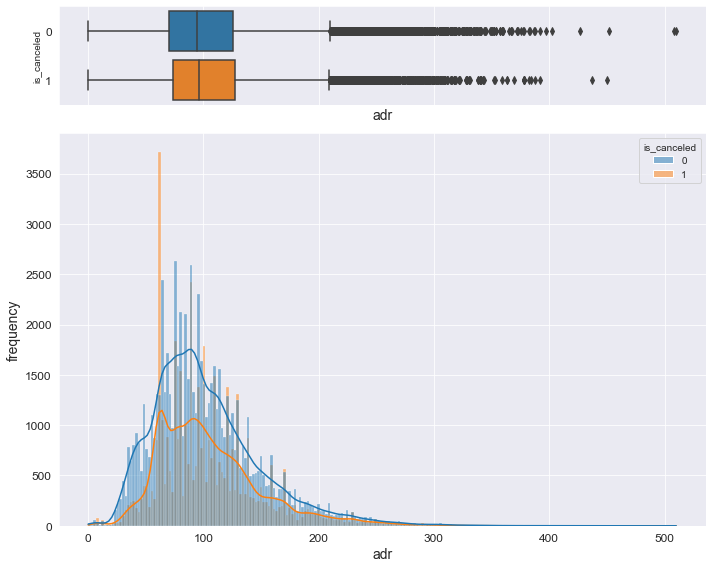

,adr all,adr is_canceled 1,adr is_canceled 0
count,117429.000000,44010.000000,73419.000000
mean,103.485715,105.352026,102.366980
std,46.708039,45.679387,47.278936
min,0.260000,0.500000,0.260000
25%,70.530000,73.425000,70.000000
50%,95.000000,96.300000,94.500000
75%,126.000000,127.815000,126.000000
max,510.000000,450.000000,510.000000
lower_whisker,-12.675000,-8.160000,-14.000000
upper_whisker,209.205000,209.400000,210.000000


In [5]:
data = df[(df['adr']<5000) & (df['adr']>0)]
plot_dist_hue('adr', df=data)

Dengan melakukan filtering pada ADR dengan menghilangkan nilai ADR paling ekstrim dan nilai ADR dibawah 0, didapati rerata ADR yang membatalkan (105,35) lebih besar dibandingkan dengan yang tidak membatalkan (102,37). Selain itu, 
terlihat juga bahwa deviasi standar ADR pada reservasi yang dibatalkan dan tidak dibatalkan tidak terlalu jauh berbeda, sehingga bisa dikatakan bahwa persebaran ADR pada kedua kategori tersebut relatif serupa.
Dari data distribusi dan statistik deskriptif ini, dapat ditarik kesimpulan bahwa harga ADR dapat mempengaruhi keputusan pelanggan untuk membatalkan reservasi mereka.

## 2. Bulan apa dengan jumlah pemesanan hotel terbanyak?

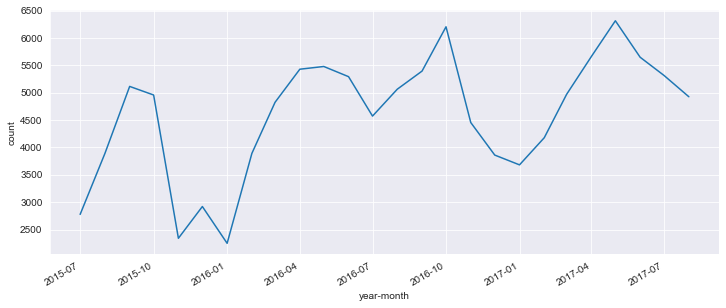

In [7]:
# preprocess to month year
temp_date = df.groupby(['arrival_date_year', 'arrival_date_month'])['hotel'].count().reset_index()
month_year = temp_date[['arrival_date_month', 'arrival_date_year']].apply(lambda x: x[0] + ' ' + str(x[1]), axis=1)
month_year = pd.to_datetime(month_year, format='%B %Y')
temp_date['month year'] = month_year
temp_date = temp_date.set_index('month year')

# line plot
plt.figure(figsize=(12,5))
temp_date['hotel'].plot(kind='line')
plt.xlabel('year-month')
plt.ylabel('count')
plt.show()

- Pemesanan hotel mengalami fluktuasi setiap bulannya.
- Mei 2017 merupakan pemesanan hotel terbanyak sebesar 6313.
- Mei 2016 menjadi pemesanan terbesar kedua selama tahun 2016 sebesar 5478.
- Dapat indikasikan bulan Mei menjadi puncak pemesanan hotel.
- Terjadi peningkatan pemesanan hotel pada selang waktu Januari hingga Mei 2016.

## 3. Berapa persentase pemesanan hotel yang dilakukan oleh tamu yang sudah pernah memesan hotel sebelumnya?

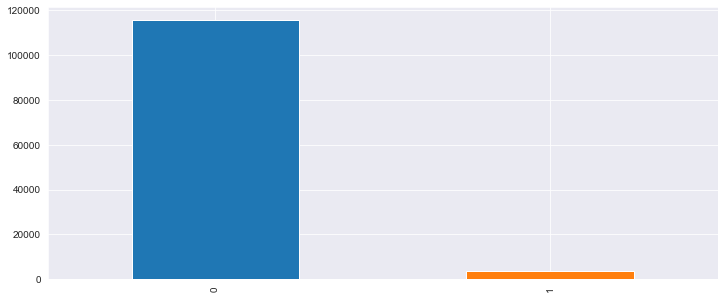

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

In [9]:
# define color bar
colors = sns.color_palette()[:2]

# bar plot
plt.figure(figsize=(12,5))
df['is_repeated_guest'].value_counts().plot(kind='bar', color=colors)
plt.show()

# proportion
df['is_repeated_guest'].value_counts()/len(df)

Diketahui sebesar 3810 atau 3,19% tamu yang melakukan pemesanan ke hotel yang sama. Menunjukkan bahwa pemesanan hotel banyak merupakan tamu baru.

## 4. Berapa peluang paling tinggi antara no deposit, no refund, dan refundable yang melakukan pembatalan pemesanan hotel?

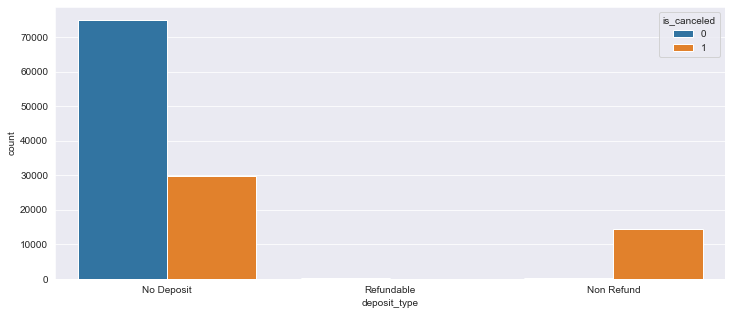

deposit_type  is_canceled
No Deposit    0              71.622978
              1              28.377022
Non Refund    0               0.637554
              1              99.362446
Refundable    0              77.777778
              1              22.222222
dtype: float64

In [10]:
# bar plot
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.show()

# proportion each type
total_deposit = df.groupby('deposit_type')['deposit_type'].count()
count_deposit = df.groupby(['deposit_type', 'is_canceled'])['is_canceled'].count()
(count_deposit/total_deposit) * 100

- Pemesanan yang menggunakan jenis deposit non refund memiliki peluang yang besar sebesar 99,36% untuk melakukan pembatalan pemesanan.
- Pemesanan tidak menggunakan deposit memiliki peluang 28,37% melakukan pembatalan pemesanan, hal tersebut dapat merugikan pihak hotel sehingga pemesan dapat dianjurkan untuk menggunakan jenis deposit refundable dan menawarkan beberapa diskon pada pemesanan refundable.

## 5. Mana yang lebih tinggi, peluang turis lokal atau non lokal yang melakukan pembatalan?

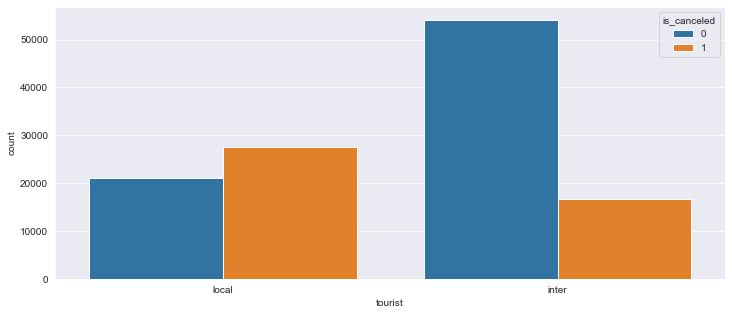

tourist  is_canceled
inter    0              76.405367
         1              23.594633
local    0              43.364890
         1              56.635110
dtype: float64

In [11]:
# define local non local tourist
df['tourist'] = df['country'].apply(lambda x: 'local' if x=='PRT' else 'inter')

# bar plot
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='tourist', hue='is_canceled')
plt.show()

# proportion each type
total_tourist = df.groupby('tourist')['tourist'].count()
count_tourist = df.groupby(['tourist', 'is_canceled'])['is_canceled'].count()
(count_tourist/total_tourist) * 100

In [12]:
count_tourist

tourist  is_canceled
inter    0              54095
         1              16705
local    0              21071
         1              27519
Name: is_canceled, dtype: int64

- Turis lokal memiliki peluang untuk membatalkan pemesanan lebih tinggi (56,64%) dibandingkan dengan turis asing.
- Hal tersebut dapat menjadi pertimbanagn pihak hotel dengan memberikan promo kepada turis lokal untuk menurunkan peluang pembatalan dan/atau dapat memfokuskan penjualan pemesanan hotel kepada turis asing. 